# **Mount your drive if you are running the code in Colab Notebooks**

In [67]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **This part is an addition for saving the outputs print() in a txt file**

In [ ]:

######
# Define the rtf/txt file path
output_file_path = "HMW_05/ML_HW5_output.txt"

# Open output file in write mode and clear its contents (if it exists)
output_file = open(output_file_path, 'w')
output_file.close()  # This will clear the contents if the file already exists

# Reopen the output file in append mode to keep it open
rtf_file = open(output_file_path, 'a')

# Define a custom "pseudo personal print" function
def perprint(message, end = None, file = rtf_file):
    print(message, end = end)
    print(message, end = end, file = file)
######

perprint("Starting...\n")


Starting...



# **I. Gaussian Process**

I. Gaussian Process 

   Task 1: 
	Figure_Task_1.jpg 



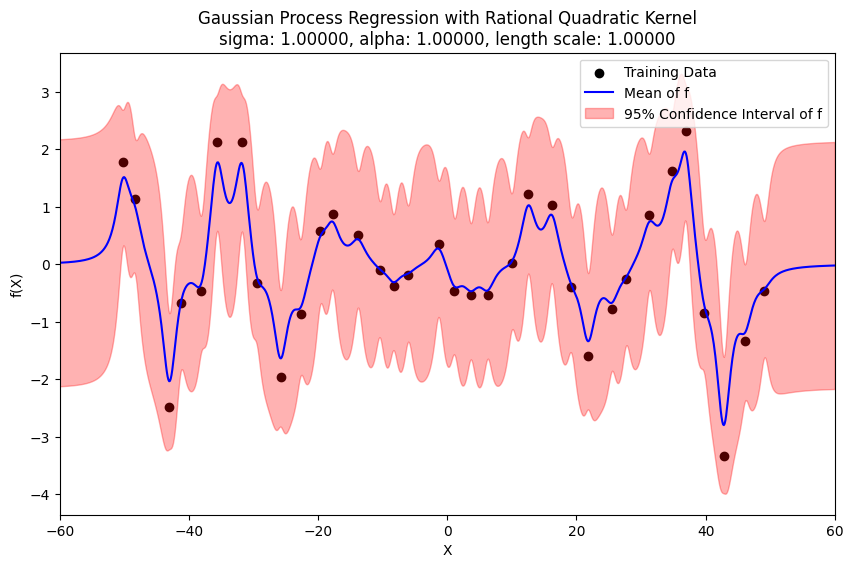


   Task 2: 
	Figure_Task_2.jpg 



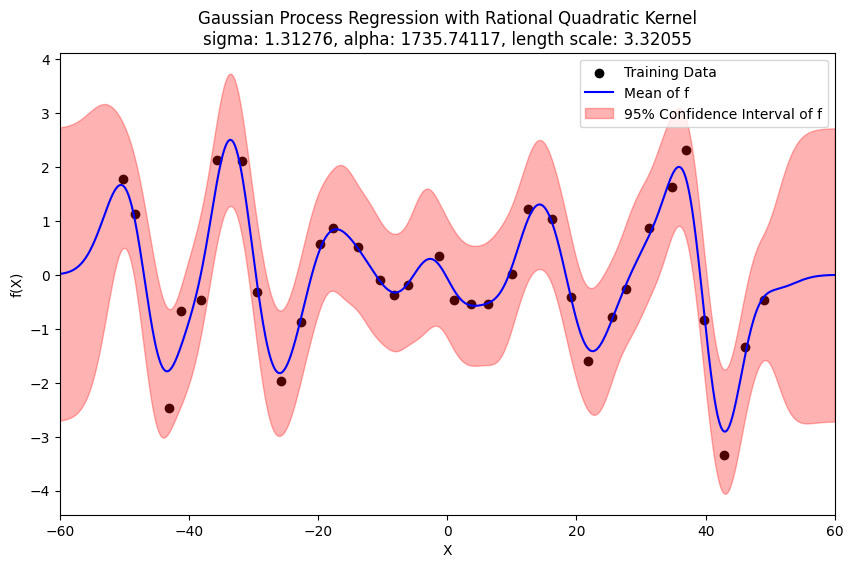

In [ ]:
##
### I. Gaussian Process
###    In this section, you are going to implement Gaussian Process and visualize the result.
perprint("I. Gaussian Process \n")
##

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd

""" Input path for I. Gaussian Process"""
input_file_path_gaussian_process = 'HMW_05/data/input.data'

# Training data
input_data = np.loadtxt(input_file_path_gaussian_process)
X = input_data[:, 0].reshape(-1, 1)  # Input features
Y = input_data[:, 1].reshape(-1, 1)  # Observed values

# Define the rational quadratic kernel
def Rational_Quadratic_Kernel(X1, X2, sigma, alpha, length_scale):
    """ Using rational quadratic kernel function: k(x_i, x_j) = (sigma^2) * (1 + (x_i-x_j)^2 / (2*alpha * length_scale^2))^-alpha. """
    #square_distance = np.power(X1.reshape(-1,1) - X2.reshape(1,-1), 2)
    #square_distance = np.sum(X1 ** 2, axis = 1).reshape(-1, 1) + np.sum(X2 ** 2, axis=1) - 2 * X1 @ X2.T
    """ This one with numpy is faster than those with ssd.cdist """
    #square_distance = np.power(ssd.cdist(X1, X2), 2)
    square_distance = ssd.cdist(X1, X2, 'sqeuclidean')
    """ This is better than the ssd.cdist with numpy """
    #perprint(square_error, end ="\n\n")
    kernel = (sigma ** 2) * np.power( 1 + square_distance/(2*alpha*length_scale**2), -alpha )
    return kernel

# Define the Gaussian Process Regression
def Gaussian_Process_Regression(X, Y, new_X, beta, sigma, alpha, length_scale):
    """ Gaussian process regression with rational quadratic kernel. """

    K_train_train = Rational_Quadratic_Kernel(X, X, sigma, alpha, length_scale) # Kernel(X, X)
    C = K_train_train + (1 / beta) * np.eye(len(X)) # Covariance matrix

    inv_C = np.linalg.inv(C) # Inverse of covariance matrix
    K_train_new = Rational_Quadratic_Kernel(X, new_X, sigma, alpha, length_scale) # Kernel(X, new_X)
    K_new_new = Rational_Quadratic_Kernel(new_X, new_X, sigma, alpha, length_scale) # Kernel(new_X, new_X)
    K_new_new += (1 / beta) * np.eye(len(new_X)) # Kernel(new_X, new_X) with 1/beta added its diagonal

    mean_new = np.dot(K_train_new.T, np.dot(inv_C, Y)) # Mean of new_X
    cov_new = K_new_new - np.dot(K_train_new.T, np.dot(inv_C, K_train_new)) # Covariance of new_X

    return mean_new, cov_new

# Define the Negative Marginal Log-Likelihood
def Negative_Marginal_Log_Likelihood(params, X, Y, beta):
    sigma, alpha, length_scale = params

    K_train_train = Rational_Quadratic_Kernel(X, X, sigma, alpha, length_scale)  # Kernel(X, X)
    C = K_train_train + (1 / beta) * np.eye(len(X)) # Covariance matrix
    inv_C = np.linalg.inv(C) # Inverse of covariance matrix

    neg_marg_log_lik = 0.5 * len(X) * np.log(2 * np.pi)  # (k/2) * log(2*pi)
    neg_marg_log_lik += np.sum(np.log(np.diagonal(np.linalg.cholesky(C)))) # 0.5*log(det(C)), more  stable
    #neg_marg_log_lik += 0.5 * np.log(np.linalg.det(C))  # (1/2)*log(det(C))
    neg_marg_log_lik += 0.5 * np.dot(Y.T, np.dot(inv_C, Y)) # (1/2)*(Y.T).(inv_C).Y

    return neg_marg_log_lik

# Define the Visualization function
def Visualize_Gaussian_Process(X_train, Y_train, new_X, mean_new, cov_new, sigma, alpha, length_scale):
    plt.figure(figsize=(10, 6))

    # Plot training data points
    plt.scatter(X_train, Y_train, color='k', label='Training Data')

    # Draw a line to represent mean of f in range [-60,60].
    plt.plot(new_X, mean_new, color='b', label='Mean of f')

    interval = 1.96 * np.sqrt(np.diag(cov_new))
    new_X = new_X.ravel()
    mean_new = mean_new.ravel()
    # Mark the 95% confidence interval of f.
    plt.fill_between(new_X, mean_new + interval, mean_new - interval, color='r', alpha=0.3, label='95% Confidence Interval of f')

    plt.legend()
    plt.xlim(-60, 60)
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.title('Gaussian Process Regression with Rational Quadratic Kernel\n'
          f'sigma: {sigma:.5f}, alpha: {alpha:.5f}, length scale: {length_scale:.5f}')
    #plt.grid(True)
    plt.show()

if __name__ == '__main__':
    perprint("   Task 1: ")
    perprint("\tFigure_Task_1.jpg \n")
    # Get new points in range [-60,60]
    new_X = np.linspace(-60.0, 60.0, 1000).reshape(-1, 1)
    # Parameter beta
    beta = 5
    # Kernel parameters
    sigma = 1
    alpha = 1
    length_scale = 1

    # Perform Gaussian Process Regression
    mean_new, cov_new = Gaussian_Process_Regression(X, Y, new_X, beta, sigma, alpha, length_scale)
    # Visualize the result
    Visualize_Gaussian_Process(X, Y, new_X, mean_new, cov_new, sigma, alpha, length_scale)


    ###
    perprint("\n   Task 2: ")
    perprint("\tFigure_Task_2.jpg \n")
    # Initial kernel parameters
    initial_params = [sigma, alpha, length_scale]

    # Optimize kernel parameters
    optimized = minimize(Negative_Marginal_Log_Likelihood, initial_params,
                        bounds = ((1e-7, None), (1e-7, None), (1e-7, None)),
                        args = (X, Y, beta)).x  # Don't forget .x
    sigma = optimized[0]
    alpha = optimized[1]
    length_scale = optimized[2]

    # Perform Gaussian Process Regression
    mean_new, cov_new = Gaussian_Process_Regression(X, Y, new_X, beta, *optimized)

    # Visualize the result
    Visualize_Gaussian_Process(X, Y, new_X, mean_new, cov_new, sigma, alpha, length_scale)




# **II. SVM on MNIST**

# **You must first install libsvm**

In [8]:
pip install libsvm-official

  Preparing metadata (setup.py) ... done
  Created wheel for libsvm-official: filename=libsvm_official-3.32.0-cp310-cp310-linux_x86_64.whl size=123884 sha256=67507c03e6bb568e183bfb1b2612bce846d779139be05295111c8d368f98d023
  Stored in directory: /root/.cache/pip/wheels/61/3b/1b/73bb4869517f96a26c82b47ccdb9ec48f12f4466de2371eff6
Successfully built libsvm-official


# **Test that libsvm is installed by importing libsvm.svmutil**

In [70]:

##
### II. SVM on MNIST dataset
###    In this section, you are going to implement Gaussian Process and visualize the result.
perprint("II. SVM on MNIST dataset \n")
##

from libsvm.svmutil import * #svm_read_problem, svm_train, svm_predict


II. SVM on MNIST dataset 



# **Task 1**

In [ ]:

""" Input paths for II. SVM on MNIST dataset"""
X_train_file_path = "HMW_05/data/X_train.csv"
Y_train_file_path = "HMW_05/data/Y_train.csv"
X_test_file_path = "HMW_05/data/X_test.csv"
Y_test_file_path = "HMW_05/data/Y_test.csv"

###
perprint("   Task 1: \n")

# Load training and testing data
X_train = np.loadtxt(X_train_file_path, delimiter=',')
Y_train = np.loadtxt(Y_train_file_path)
X_test = np.loadtxt(X_test_file_path, delimiter=',')
Y_test = np.loadtxt(Y_test_file_path)

# Convert Y_train and Y_test to integers (if not already)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# Define kernel types
kernel_types = {'linear':'-t 0', 'polynomial':'-t 1', 'radial basis function':'-t 2'}

perprint("\tUsing hard-SVM (cost c= 10) to compare 3 kernel functions in default mode: \n")
perprint("\t0 -- linear: u'*v ")
perprint("\t1 -- polynomial: (gamma*u'*v + coef0)^degree ")
perprint("\t2 -- radial basis function: exp(-gamma*|u-v|^2) ")
perprint("\t(-d degree: default = 3), (-r coef0: default 0) (-g default = 1/num_features) \n")
accuracies = []
for k, param in kernel_types.items():
    # Set SVM parameters
    parameters = f'-s 0 {param} -c 10 -q'
    """ (-s default = 0) is for the SVM type, and we will set to -s 0 for C-SVM
        -q for quite mode.
        (-c value = large_value) to use hard margin
        (-d default = 3) degree in polynomial kernel
        (-r coef0: default 0) coefficient in polynomial kernel
        (-g default = 1/num_features) gamma in rbf and polynomial kernels
        (-c default = 1.0)
    """

    # Train the SVM model: Y comes before X
    model = svm_train(Y_train, X_train, parameters)

    # Make predictions and get the accuracy
    p_label, p_acc, p_vals = svm_predict(Y_test, X_test, model, '-q')

    perprint(f"\t{k} kernel's accuracy: {p_acc[0]:.2f} % ")
    accuracies.append(p_acc[0])

""" Comparing kernels"""
perprint("\n\tRanking all the kernels in Task 1: ")
# Create a list of tuples containing kernel type and its accuracy
kernel_accuracies = list(zip(kernel_types.keys(), accuracies))

# Sort the list of tuples based on accuracy in descending order
sorted_kernel_accuracies = sorted(kernel_accuracies, key=lambda x: x[1], reverse=True)

# Print the sorted kernels with ranking numbers and their accuracies
for rank, (kernel, accuracy) in enumerate(sorted_kernel_accuracies, start=1):
    perprint(f"\t\tRank {rank}: {kernel}: Accuracy - {accuracy:.2f} %")


   Task 1: 

	Using hard-SVM (cost c= 10) to compare 3 kernel functions in default mode: 

	0 -- linear: u'*v 
	1 -- polynomial: (gamma*u'*v + coef0)^degree 
	2 -- radial basis function: exp(-gamma*|u-v|^2) 
	(-d degree: default = 3), (-r coef0: default 0) (-g default = 1/num_features) 

	linear kernel's accuracy: 95.00 % 
	polynomial kernel's accuracy: 79.72 % 
	radial basis function kernel's accuracy: 96.32 % 

	Ranking all the kernels in Task 1: 
		Rank 1: radial basis function: Accuracy - 96.32 %
		Rank 2: linear: Accuracy - 95.00 %
		Rank 3: polynomial: Accuracy - 79.72 %


# **Task 2**

In [72]:

###
perprint("\n   Task 2: \n")

# Define Grid Search
def Grid_Search(costs, gammas, degrees, coefficients, kernel, param, X_train, Y_train):

    if kernel == 'linear':
        accuracies = np.zeros( len(costs) )

        for i in range(len(costs)):
            parameters = f'-s 0 {param} -v 3 -c {costs[i]} -q'
            accuracies[i] = svm_train(Y_train, X_train, parameters)

        accuracy_optimal = np.max(accuracies)
        argmax_index = np.argmax(accuracies)
        cost_optimal = costs[argmax_index]

        return cost_optimal, accuracy_optimal

    elif kernel == 'radial basis function':
        accuracies = np.zeros(( len(costs), len(gammas) ))

        for i in range(len(costs)):
            for j in range(len(gammas)):
                parameters = f'-s 0 {param} -v 3 -c {costs[i]} -g {gammas[j]} -q'
                accuracies[i, j] = svm_train(Y_train, X_train, parameters)

        accuracy_optimal = np.max(accuracies)
        argmax_indices = np.unravel_index(np.argmax(accuracies), accuracies.shape)
        c_index, g_index = argmax_indices
        cost_optimal = costs[c_index]
        gamma_optimal = costs[g_index]

        return cost_optimal, gamma_optimal, accuracy_optimal

    elif kernel == 'polynomial':
        accuracies = np.zeros(( len(costs), len(gammas), len(degrees), len(coefficients) ))

        for i in range(len(costs)):
            for j in range(len(gammas)):
                for k in range(len(degrees)):
                    for p in range(len(coefficients)):
                        parameters = f'-s 0 {param} -v 3 -c {costs[i]} -g {gammas[j]} -d {int(degrees[k])} -r {coefficients[p]} -q'
                        accuracies[i, j, k, p] = svm_train(Y_train, X_train, parameters)

        accuracy_optimal = np.max(accuracies)
        argmax_indices = np.unravel_index(np.argmax(accuracies), accuracies.shape)
        #print(argmax_indices) ###
        c_index, g_index, d_index, r_index= argmax_indices
        cost_optimal = costs[c_index]
        gamma_optimal = costs[g_index]
        degree_optimal = int(degrees[d_index])
        coef_optimal = coefficients[r_index]

        return cost_optimal, gamma_optimal, degree_optimal, coef_optimal, accuracy_optimal

    else:
      perprint("\n\tYou didn't give a valid input. \n")


#kernel_types = {'linear':'-t 0','polynomial':'-t 1','radial basis function':'-t 2'}
kernel_types = {'linear':'-t 0', 'radial basis function':'-t 2', 'polynomial':'-t 1'}
costs = [0.001, 0.01, 0.1, 1.0, 10]
gammas = [0.001, 0.01, 0.1, 1.0]
degrees = [2, 3, 4]
coefficients = [0.0, 1.0, 2.0]
perprint("\tUsing Grid Search on soft-SVM to find best values of: \n\tcost 'c', gamma 'g', degree 'd' and coefficient 'r' \n")
perprint(f"\tcosts: {costs} \n\tgammas: {gammas} \n\tdegrees: {degrees} \n\tcoefficients: {coefficients} \n")


results = {
    'linear': {'accuracy': None, 'cost': None},
    'polynomial': {'accuracy': None, 'cost': None, 'gamma': None, 'degree': None, 'coefficient': None},
    'radial basis function': {'accuracy': None, 'cost': None, 'gamma': None}
}

for kernel, param in kernel_types.items():
    """ (-s default = 0) is for the SVM type, and we will set to -s 0 for C-SVM
        -q for quite mode.
        (-c value = large_value) to use hard margin
        (-d default = 3) degree in polynomial kernel
        (-r coef0: default 0) coefficient in polynomial kernel
        (-g default = 1/num_features) gamma in rbf and polynomial kernels
        (-c default = 1.0)
    """

    if kernel == 'linear':
        cost_optimal, accuracy_optimal = Grid_Search(costs, gammas, degrees, coefficients, kernel, param, X_train, Y_train)
        #cost_optimal, accuracy_optimal = 0.1, 96.9
        perprint(f"\tFor {kernel} kernel, grid search optimal accuracy = {accuracy_optimal:.2f} %, for: \n\t\toptimal cost = {cost_optimal} ")

        new_values = {'accuracy': accuracy_optimal, 'cost': cost_optimal}
        results[kernel].update(new_values)

        parameters = f'-s 0 {param} -c {cost_optimal} -q'
        model = svm_train(Y_train, X_train, parameters)
        _, p_acc, __ = svm_predict(Y_test, X_test, model, '-q')

        results[kernel]['accuracy'] = p_acc[0]
        #perprint(results[kernel]['accuracy']) ###
        perprint(f"\t   and testing data optimal accuracy = {p_acc[0]:.2f} % \n")

    elif kernel == 'radial basis function':
        cost_optimal, gamma_optimal, accuracy_optimal = Grid_Search(costs, gammas, degrees, coefficients, kernel, param, X_train, Y_train)
        #cost_optimal, gamma_optimal, accuracy_optimal = 10, 0.01, 98.08
        perprint(f"\tFor {kernel} kernel, grid search optimal accuracy = {accuracy_optimal:.2f} %, for: \n\t\toptimal cost = {cost_optimal} ")
        perprint(f"\t\toptimal gamma = {gamma_optimal} ")

        new_values = {'accuracy': accuracy_optimal, 'cost': cost_optimal, 'gamma': gamma_optimal}
        results[kernel].update(new_values)

        parameters = f'-s 0 {param} -c {cost_optimal} -g {gamma_optimal} -q'
        model = svm_train(Y_train, X_train, parameters)
        _, p_acc, __ = svm_predict(Y_test, X_test, model, '-q')

        results[kernel]['accuracy'] = p_acc[0]
        #perprint(results[kernel]['accuracy']) ###
        perprint(f"\t   and testing data optimal accuracy = {p_acc[0]:.2f} % \n")

    elif kernel == 'polynomial':
        cost_optimal, gamma_optimal, degree_optimal, coef_optimal, accuracy_optimal = Grid_Search(costs, gammas, degrees, coefficients, kernel, param, X_train, Y_train)
        #cost_optimal, gamma_optimal, degree_optimal, coef_optimal, accuracy_optimal = 0.01, 0.1, 3, 2, 98.22
        perprint(f"\tFor {kernel} kernel, grid search optimal accuracy = {accuracy_optimal:.2f} %, for: \n\t\toptimal cost = {cost_optimal} ")
        perprint(f"\t\toptimal gamma = {gamma_optimal} ")
        perprint(f"\t\toptimal degree = {degree_optimal} \n\t\toptimal coefficient = {coef_optimal} ")

        new_values = {'accuracy': accuracy_optimal, 'cost': cost_optimal, 'gamma': gamma_optimal, 'degree': degree_optimal, 'coefficient': coef_optimal}
        results[kernel].update(new_values)

        parameters = f'-s 0 {param} -c {coef_optimal} -g {gamma_optimal} -d {int(degree_optimal)} -r {coef_optimal} -q'
        model = svm_train(Y_train, X_train, parameters)
        _, p_acc, __ = svm_predict(Y_test, X_test, model, '-q')

        results[kernel]['accuracy'] = p_acc[0]
        #perprint(results[kernel]['accuracy']) ###
        perprint(f"\t   and testing data optimal accuracy = {p_acc[0]:.2f} % \n")


perprint("\tRanking all the kernels after grid search in Task 2: ")
# Sort the kernels based on accuracy
sorted_kernels = sorted(results.keys(), key = lambda k: results[k]['accuracy'], reverse=True)

# Print the sorted kernels with ranking numbers and their accuracies
for rank, kernel in enumerate(sorted_kernels, start=1):
    perprint(f"\t\tRank {rank}: {kernel}: Accuracy - {results[kernel]['accuracy']:.2f} %")


   Task 2: 

	Using Grid Search on soft-SVM to find best values of: 
	cost 'c', gamma 'g', degree 'd' and coefficient 'r' 

	costs: [0.001, 0.01, 0.1, 1.0, 10] 
	gammas: [0.001, 0.01, 0.1, 1.0] 
	degrees: [2, 3, 4] 
	coefficients: [0.0, 1.0, 2.0] 

Cross Validation Accuracy = 95.36%
Cross Validation Accuracy = 96.88%
Cross Validation Accuracy = 96.58%
Cross Validation Accuracy = 96.1%
Cross Validation Accuracy = 96.12%
	For linear kernel, grid search optimal accuracy = 96.88 %, for: 
		optimal cost = 0.01 
	   and testing data optimal accuracy = 95.96 % 

Cross Validation Accuracy = 80.84%
Cross Validation Accuracy = 89.86%
Cross Validation Accuracy = 50.36%
Cross Validation Accuracy = 20.46%
Cross Validation Accuracy = 81.12%
Cross Validation Accuracy = 91.8%
Cross Validation Accuracy = 49%
Cross Validation Accuracy = 20.74%
Cross Validation Accuracy = 91.78%
Cross Validation Accuracy = 96.3%
Cross Validation Accuracy = 53.6%
Cross Validation Accuracy = 20.98%
Cross Validation Accura

# **Save the resuls dictionary to avoid crying later**

In [75]:
"""
import pickle
# Pickle file path
pickle_path = "/content/drive/MyDrive/NYCU/00- Sem 01 - Fall 2023/Machine Learning/HMW_05/grid_search_results.pkl"
# Save the dictionary to a file
with open(pickle_path, 'wb') as file:
    pickle.dump(results, file)
# Load the dictionary from the file
with open(pickle_path, 'rb') as file:
    loaded_results = pickle.load(file)
"""

# Numpy file path
numpy_path = "/content/drive/MyDrive/NYCU/00- Sem 01 - Fall 2023/Machine Learning/HMW_05/grid_search_results.npy"
# Save the dictionary to a file
np.save(numpy_path, results)
# Load the dictionary from the file
loaded_results = np.load(numpy_path, allow_pickle = True).item()


# **Task 3**

In [76]:

###
perprint("\n   Task 3: \n")

def linearKernel(X1, X2):
    kernel = np.dot( X1, X2.T )
    return kernel

def RBFKernel(X1, X2, gamma):
    square_distance = ssd.cdist(X1, X2, 'sqeuclidean')
    kernel = np.exp(-1 * gamma * square_distance)
    return kernel

def precomputed_kernel(X1, X2, gamma):
    kernel_linear = linearKernel(X1, X2)
    kernel_RBF = RBFKernel(X1, X2, gamma)

    kernel = kernel_linear + kernel_RBF
    kernel = np.hstack(( np.arange(1, len(X1)+1).reshape(-1,1), kernel ))
    return kernel

perprint("\tUsing 'linear kernel + RBF kernel' to form a new kernel: \n")

gamma = results['radial basis function']['gamma'] # 0.01

####
# Train SVM with new kernel
kernel_train = precomputed_kernel(X_train, X_train, gamma)
prob = svm_problem(Y_train, kernel_train, isKernel = True)

parameters = f'-s 0 -t 4 -q' # 4 for precomputed kernels
model = svm_train(prob, parameters)

# Test SVM with new kernel
kernel_test = precomputed_kernel(X_test, X_train, gamma)
p_label, p_acc, p_vals = svm_predict(Y_test, kernel_test, model, '-q')
####

perprint(f"\t'linear + RBF' kernel's accuracy: {p_acc[0]:.2f} %, ")
perprint(f"\twith gamma = {gamma:.2f} \n")

# Adding a new kernel in my dictionary
new_kernel = 'linear + RBF'
results[new_kernel] = {'accuracy': p_acc[0], 'gamma': gamma}

perprint("\tRanking the new kernel along with the kernels of Task 2: ")
# Sort the kernels based on accuracy
sorted_kernels = sorted(results.keys(), key = lambda k: results[k]['accuracy'], reverse=True)

# Print the sorted kernels with ranking numbers and their accuracies
for rank, kernel in enumerate(sorted_kernels, start=1):
    perprint(f"\t\tRank {rank}: {kernel}: Accuracy - {results[kernel]['accuracy']:.2f} % ")



   Task 3: 

	Using 'linear kernel + RBF kernel' to form a new kernel: 

	'linear + RBF' kernel's accuracy: 95.32 %, 
	with gamma = 0.01 

	Ranking the new kernel along with the kernels of Task 2: 
		Rank 1: radial basis function: Accuracy - 98.20 % 
		Rank 2: polynomial: Accuracy - 97.72 % 
		Rank 3: linear: Accuracy - 95.96 % 
		Rank 4: linear + RBF: Accuracy - 95.32 % 


# **Optimizing the parameter gamma of the new kernel.**

In [77]:

###
perprint("\n\tOptimizing the new kernel's parameter gamma: \n")

costs = [0.001, 0.01, 0.1, 1.0, 10]
gammas = [0.001, 0.01, 0.1, 1.0]

accuracies = np.zeros(len(gammas))
for i in range(len(gammas)):

    kernel_train = precomputed_kernel(X_train, X_train, gammas[i])
    prob = svm_problem(Y_train, kernel_train, isKernel = True)

    parameters = f'-s 0 -t 4 -v 3 -q' # 4 for precomputed kernels
    accuracies[i] = svm_train(prob, parameters)

argmax_index = np.argmax(accuracies)
gamma_optimal = costs[argmax_index]

####
# Train SVM with new kernel and optimized gamma
kernel_train = precomputed_kernel(X_train, X_train, gamma_optimal)
prob = svm_problem(Y_train, kernel_train, isKernel = True)

parameters = f'-s 0 -t 4 -q' # 4 for precomputed kernels
model = svm_train(prob, parameters)

# Test optimized gamma with new kernel and optimized gamma
kernel_test = precomputed_kernel(X_test, X_train, gamma_optimal)
_, p_acc, __ = svm_predict(Y_test, kernel_test, model, '-q')
####

perprint(f"\tUsing Grid Search, gamma optimal = {gamma_optimal}, ")
perprint(f"\tand testing data optimal accuracy = {p_acc[0]:.2f} % \n")

# Update gamma and the new accuracy for the new kernel
results[new_kernel] = {'accuracy': p_acc[0], 'gamma': gamma_optimal}

perprint("\tRanking the optimized new kernel along with the kernels of Task 2: ")
# Sort the kernels based on accuracy
sorted_kernels = sorted(results.keys(), key = lambda k: results[k]['accuracy'], reverse=True)

# Print the sorted kernels with ranking numbers and their accuracies
for rank, kernel in enumerate(sorted_kernels, start=1):
    perprint(f"\t\tRank {rank}: {kernel}: Accuracy - {results[kernel]['accuracy']:.2f} % ")



	Optimizing the new kernel's parameter gamma: 

Cross Validation Accuracy = 96.1%
Cross Validation Accuracy = 96.58%
Cross Validation Accuracy = 96.58%
Cross Validation Accuracy = 96.44%
	Using Grid Search, gamma optimal = 0.01, 
	and testing data optimal accuracy = 95.32 % 

	Ranking the optimized new kernel along with the kernels of Task 2: 
		Rank 1: radial basis function: Accuracy - 98.20 % 
		Rank 2: polynomial: Accuracy - 97.72 % 
		Rank 3: linear: Accuracy - 95.96 % 
		Rank 4: linear + RBF: Accuracy - 95.32 % 


# **Make sure to close the file where outputs of print() are saved.**

In [1]:
perprint("\n\nEnd")
# Close the RTF file at the end of your code
rtf_file.close()

NameError: name 'perprint' is not defined